# Sign Language Detection

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Data/archive.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall("/content/drive/My Drive/Data")
  print('Done')

Done


# Import all library

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

# Image loading

In [ ]:
train_directory = "/content/drive/My Drive/Data/asl_alphabet_train/asl_alphabet_train"
test_directory = "/content/drive/My Drive/Data/sign_language_dataset/asl_alphabet_test/asl_alphabet_test"

In [ ]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
            
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
uniq_labels = sorted(os.listdir(train_directory))
images, labels = load_images(train_directory)

if uniq_labels == sorted(os.listdir(test_directory)):
    X_test, y_test = load_images(test_directory)
else:
    print('ERROR......................................................')
    print('Some Labels are missin in data.')
    print('Number of Training and testing label does not match!')


ERROR......................................................
Some Labels are missin in data.
Number of Training and testing label does not match!


In [ ]:
test_directory = "/content/drive/My Drive/Data/sign_language_dataset/asl_alphabet_test/asl_alphabet_test"
X_test, y_test = load_images(test_directory)


In [ ]:
print('No. of unique lebels =',len(uniq_labels),'\n')
print('All labels are: ')
print(uniq_labels,'\n')
print(labels.shape)
print(images.shape)
print(X_test.shape)
print(y_test.shape)
print(labels)

No. of unique lebels = 29 

All labels are: 
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'] 

(87000,)
(87000, 64, 64, 3)
(29, 64, 64, 3)
(29,)
[ 0  0  0 ... 28 28 28]


In [ ]:
print(images.shape)
print(labels.shape)
print(X_test.shape)
print(y_test.shape)

(87000, 64, 64, 3)
(87000,)
(29, 64, 64, 3)
(29,)


# Split the images to train and evaluation data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.1, stratify = labels)

train_n = len(X_train)
eval_n = len(X_eval)
test_n = len(X_test)

print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)
print("Number of evaluation images: ", eval_n)

Number of training images:  78300
Number of testing images:  29
Number of evaluation images:  8700


# Print images

In [ ]:
def print_images(image_list):
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[i])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Test images: 


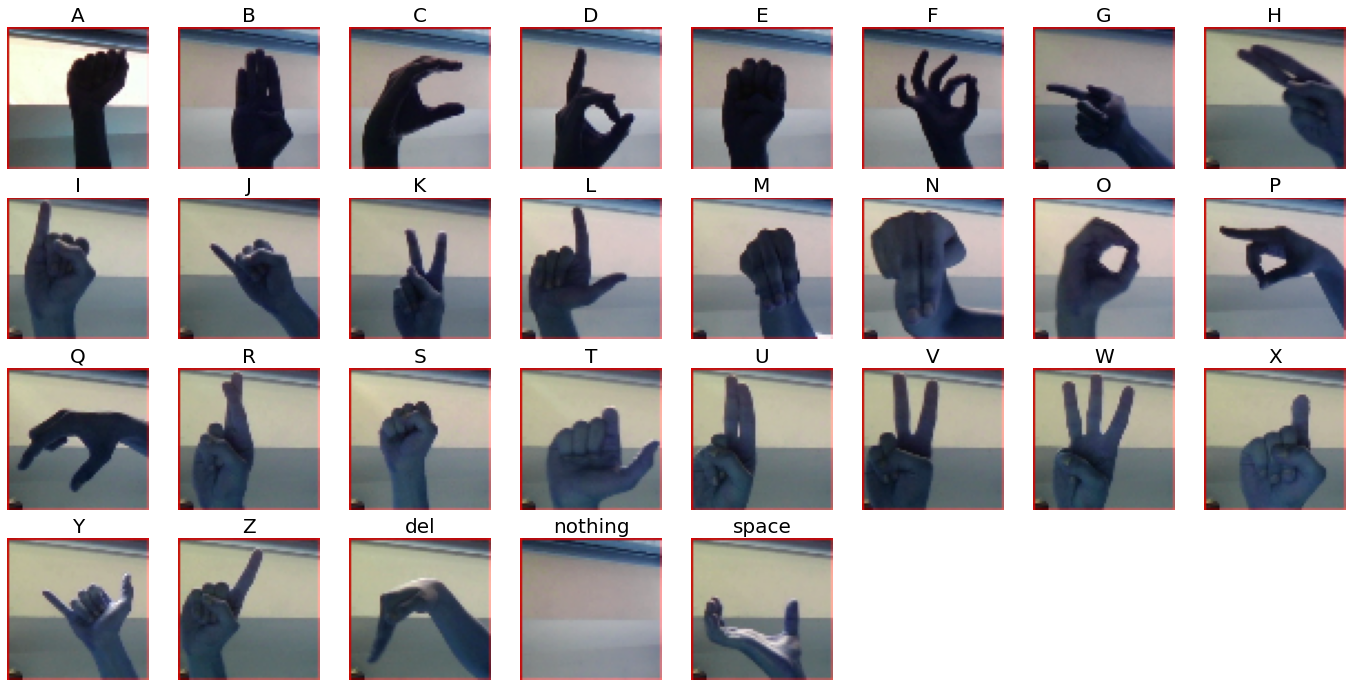

In [ ]:

print("Test images: ")
print_images(X_test)

**Print images to see that the loaded images with respect to labels are correct or not**

Label  A


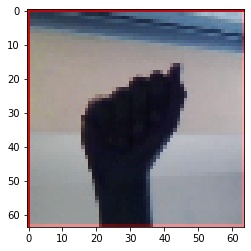

In [ ]:
print('Label ',uniq_labels[labels[200]])
plt.imshow(images[200])
plt.show()

Label  A


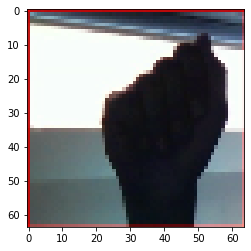

In [ ]:
print('Label ',uniq_labels[labels[38]])
plt.imshow(images[38])
plt.show()

# Convert one hot vector format

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_eval.shape,y_eval.shape)

(78300, 64, 64, 3) (78300, 29)
(29, 64, 64, 3) (29, 29)
(8700, 64, 64, 3) (8700, 29)


In [ ]:
print(len(y_train[0]))

29


# Feature extract by image shadow removing

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

# CNN model

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs = 25, batch_size = 64)
print('Done')
model.save('sign_laguage_model_saved.h5')
print('Model saved.')

Epoch 1/25
1224/1224 [==============================] - 40s 32ms/step - loss: 1.2650 - accuracy: 0.6108
Epoch 2/25
1224/1224 [==============================] - 40s 33ms/step - loss: 0.2489 - accuracy: 0.9173
Epoch 3/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1527 - accuracy: 0.9501
Epoch 4/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1263 - accuracy: 0.9610
Epoch 5/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1116 - accuracy: 0.9670
Epoch 6/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1030 - accuracy: 0.9713
Epoch 7/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1037 - accuracy: 0.9723
Epoch 8/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1066 - accuracy: 0.9731
Epoch 9/25
1224/1224 [==============================] - 41s 34ms/step - loss: 0.1080 - accuracy: 0.9737
Epoch 10/25
1224/1224 [==============================] - 41s 34m

#Load the save the model

In [ ]:
model = tf.keras.models.load_model('sign_laguage_model_saved.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0

# Training accuracy and loss plot

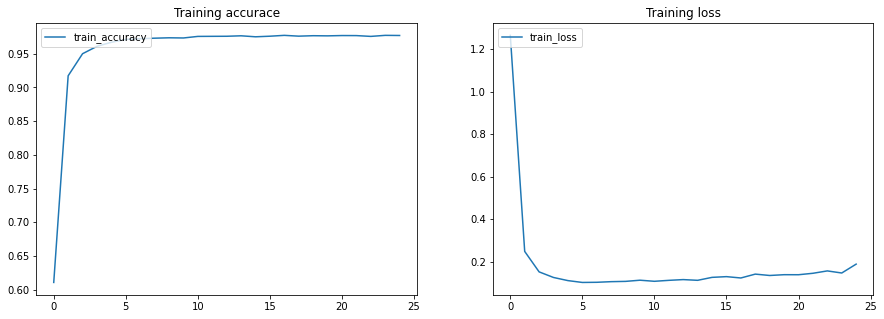

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label="train_accuracy")
plt.title('Training accurace')
plt.legend(loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label="train_loss")
plt.title('Training loss')
plt.legend(loc="upper left")
plt.show()

# Calculate training, testing and evaluate accuracy

In [ ]:
score = model.evaluate(x = X_train, y = y_train, verbose = 0)
print('Accuracy for train images:', round(score[1]*100, 3), '%')

Accuracy for train images: 99.905 %


In [ ]:
loss,score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score*100, 3), '%')

Accuracy for test images: 100.0 %


In [ ]:
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for evaluation images: 99.897 %


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
y_test_pred = model.predict(X_test, batch_size = 64, verbose = 0)
y_test2 = np.argmax(y_test, axis = 1)
y_test_pred = np.argmax(y_test_pred, axis = 1)
cm = confusion_matrix(y_test2, y_test_pred)

print('Confussion Matrix on Test data')
print(cm.shape)
print(cm)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
F_Measure = (2 * precision * recall) / (precision + recall)
print('Recall =',recall)
print('precision =',precision)
print('F-Measure =',F_Measure)

Confussion Matrix on Test data
(29, 29)
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

In [ ]:
y_eval_pred = model.predict(X_eval, batch_size = 64, verbose = 0)
y_eval2 = np.argmax(y_eval, axis = 1)
y_eval_pred = np.argmax(y_eval_pred, axis = 1)
cm = confusion_matrix(y_eval2, y_eval_pred)

print('Confussion Matrix on Evaluation data')
print(cm.shape)
print(cm)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
F_Measure = (2 * precision * recall) / (precision + recall)
print('Recall =',recall)
print('precision =',precision)
print('F-Measure =',F_Measure)

Confussion Matrix on Evaluation data
(29, 29)
[[300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0

# predict labels

In [ ]:
def predict(path):
  img = keras.preprocessing.image.load_img(path, target_size=(64, 64) )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) 

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  label = (uniq_labels[np.argmax(score)])
  return label,score

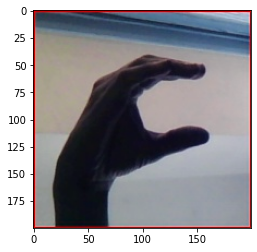

Actual class = C

prediction:	 This image most likely belongs to C with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/C2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
label,score = predict(path)
print('Actual class = C\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

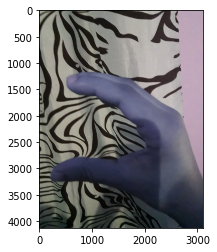

Actual class = C

prediction:	 This image most likely belongs to G with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/C_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = C\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

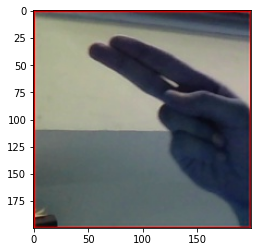

Actual class = H

prediction:	 This image most likely belongs to H with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/H2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = H\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

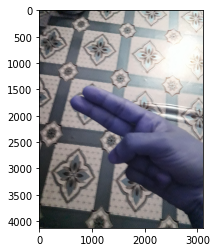

Actual class = H

prediction:	 This image most likely belongs to V with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/H_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = H\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

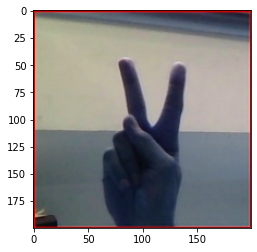

Actual class = K

prediction:	 This image most likely belongs to K with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/K2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = K\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

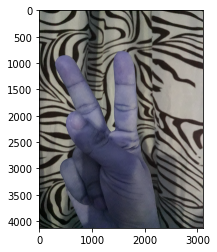

Actual class = K

prediction:	 This image most likely belongs to F with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/K_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = K\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

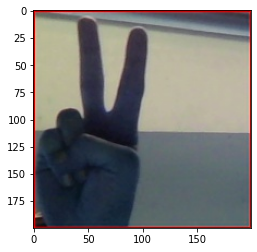

Actual class = V

prediction:	 This image most likely belongs to W with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/V2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = V\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

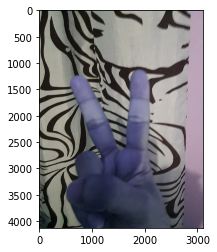

Actual class = V

prediction:	 This image most likely belongs to F with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/V_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = V\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

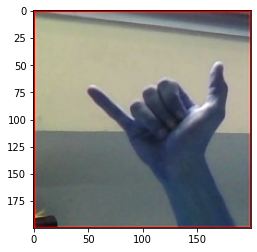

Actual class = Y

prediction:	 This image most likely belongs to Y with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/Y2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = Y\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

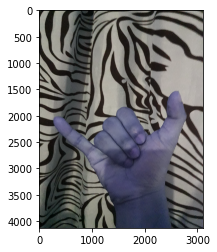

Actual class = Y

prediction:	 This image most likely belongs to F with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/Y.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = Y\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

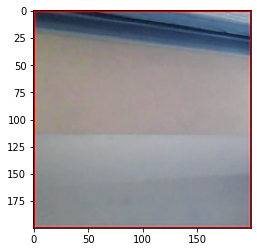

Actual class = nothing

prediction:	 This image most likely belongs to nothing with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/nothing2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = nothing\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

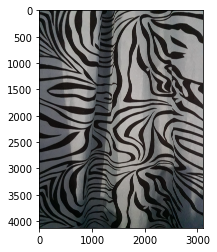

Actual class = nothing

prediction:	 This image most likely belongs to F with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/nothing_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = nothing\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

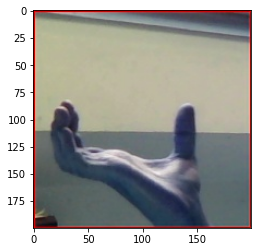

Actual class = space

prediction:	 This image most likely belongs to space with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/space2.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = space\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )

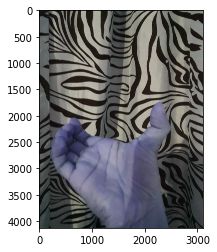

Actual class = space

prediction:	 This image most likely belongs to G with a 8.85 percent confidence.


In [ ]:
path = "/content/drive/My Drive/Data/sign_language_dataset/predict_sign_language/space_1.jpg"
image = cv2.imread(path)
plt.imshow(image)
plt.show()
print('Actual class = space\n')

label,score = predict(path)
print( "prediction:\t This image most likely belongs to {} with a {:.2f} percent confidence." .format(label, 100 * np.max(score))  )